# Trabalho 2

Cálculo Numérico - SME0104

Professora Cynthia Lage Ferreira

Alunos:
* João Pedro Buzzo Silva
* Miguel Bragante Henriques

In [ ]:
import numpy as np
import scipy.interpolate as sci
import matplotlib.pyplot as plt
import time
import math

## Exercício 1

a) O **Método de Francis** é um método iterativo utilizado para obter os autovalores e autovetores de uma matriz $A$. Isso é feito aplicando sucessivas decomposições QR, até transformar (com condição de parada e máximo de iterações $k_{máx}$) a matriz em uma matriz triangular superior $A_k$, onde os autovalores são os elementos da diagonal principal e os autovetores são as colunas da matriz:

- $V = Q_1Q_2...Q_{k-1}$

Onde as matrizes $Q_i$ foram obtidas pelas sucessivas decomposições QR.

Implementando o Método de Francis:

In [ ]:
def francis(A, tol=1e-5, kmax=100):
  # Inicializando cópia e matriz V
  A_k = A.copy()
  V = np.eye(A.shape[0])

  for k in range(kmax):
    # Aplicando decomposição QR
    Q, R = np.linalg.qr(A_k)

    # Atualizando matriz
    A_k = np.dot(R, Q)

    # Atualizando matriz V
    V = np.dot(V, Q)

    # Verificando convergência
    off = np.sqrt(np.sum(np.square(A_k - np.diag(np.diag(A_k)))))
    if off < tol:
      break

  # Os autovalores são os elementos da diagonal
  autovalores = np.diag(A_k)
  return autovalores, V

# Testando:
A = np.array([[1, 2, 3],
              [2, 1, 2],
              [3, 2, 1]])

autovalores, autovetores = francis(A)
print("Autovalores com francis:", autovalores)
print("Autovetores com francis:", autovetores)
autovalores2, autovetores2 = np.linalg.eig(A)
print("Autovalores com função pronta:", autovalores2)
print("Autovetores com função pronta:", autovetores2)

Autovalores com francis: [ 5.70156212 -2.         -0.70156212]
Autovetores com francis: [[ 6.05913153e-01 -7.07106781e-01  3.64512348e-01]
 [ 5.15499134e-01  9.66836037e-07 -8.56890100e-01]
 [ 6.05912448e-01  7.07106781e-01  3.64513519e-01]]
Autovalores com função pronta: [ 5.70156212 -2.         -0.70156212]
Autovetores com função pronta: [[-6.05912800e-01 -7.07106781e-01  3.64512933e-01]
 [-5.15499134e-01  1.47635207e-16 -8.56890100e-01]
 [-6.05912800e-01  7.07106781e-01  3.64512933e-01]]


Para verificar a convergência, fizemos:

- $off(A) = \sqrt{\sum \left( A - diag(diag(A)) \right)^2}$

O que é equivalente a tolerância dada:

- $off(A) = \left\| A \right\|_F^2 - \sum_{i=1}^{n} a_{ii}^2 = \sum_{i \neq j} a_{ij}^2$


b) A **Decomposição SVD** é utilizada para decompor uma matriz $A$, tal que:

- $A = U \Sigma V^T$

Queremos aplicar o método de Francis nas matrizes $AA^T$ e $A^TA$, para enfim obter as matrizes do SVD:

- $AA^T = U \Sigma^2 U^T$
- $A^TA = V \Sigma^2 V^T$

Do método de francis:

- $A_k = V^TAV$

  Onde $A_k$ é a matriz final do processo, e a sua diagonal fornece uma aproximação para os autovalores, enquanto as colunas de $V$ fornecem os autovetores.

Implementando a Decomposição SVD com Francis:

In [ ]:
def svd(A):
  m, n = A.shape
  if m > n:
    # Caso ATA
    ATA = A.T @ A
    # Das fórmulas acima, nesse caso, obtemos a matriz V,
    # os autovetores:
    autovalores, V = francis(ATA)
    # Obtendo sigma, pelos autovalores
    S = np.diag(np.sqrt(np.abs(autovalores)))
    # Obtendo, finalmente, U, com o sistema SVD:
    S_inv = np.linalg.inv(S)
    U = A @ V @ S_inv

  else:
    # Caso AAT
    AAT = A @ A.T
    # Das fórmulas acima, nesse caso, obtemos a matriz U,
    # os autovetores:
    autovalores, U = francis(AAT)
    # Obtendo sigma, pelos autovalores
    S = np.diag(np.sqrt(np.abs(autovalores)))
    # Obtendo, finalmente, V, com o sistema SVD:
    S_inv = np.linalg.inv(S)
    V = S_inv @ U.T @ A

  return U, S, V

# Testando:
B = np.array([[1, 2, 8, 5], [2, 1, 3, 4], [3, 7, 11, 2], [8, 5, 2, 2]])
U, S, V = svd(B)
print(f"Obtido com svd:\nU: {U}\nS: {S}\nV: {V}")
U2, Sigma, VT = np.linalg.svd(B)
print(f"Obtido com função pronta:\nU: {U2}\nS: {Sigma}\nV: {VT}")

Obtido com svd:
U: [[-0.48980619  0.43658917  0.48238628  0.58033031]
 [-0.25940422  0.01309542  0.61772533 -0.74226234]
 [-0.72827875  0.18844516 -0.60975077 -0.24960466]
 [-0.40300051 -0.87960607  0.11799534  0.22351926]]
S: [[18.07244849  0.          0.          0.        ]
 [ 0.          7.51195386  0.          0.        ]
 [ 0.          0.          4.56795648  0.        ]
 [ 0.          0.          0.          0.30154334]]
V: [[-0.35509604 -0.46213829 -0.7477531  -0.31811995]
 [-0.7998895  -0.29188684  0.51194194  0.1135531 ]
 [ 0.18225815 -0.45880052 -0.16615779  0.853625  ]
 [ 0.44818024 -0.70052293  0.38880885 -0.39652209]]
Obtido com função pronta:
U: [[-0.48980619 -0.4365892   0.48238625 -0.58033031]
 [-0.25940422 -0.01309546  0.61772532  0.74226234]
 [-0.72827875 -0.18844512 -0.60975078  0.24960466]
 [-0.40300051  0.87960606  0.1179954  -0.22351926]]
S: [18.07244849  7.51195386  4.56795648  0.30154334]
V: [[-0.35509604 -0.46213829 -0.7477531  -0.31811995]
 [ 0.7998895   0.29

c) Comprimindo imagem

Tempo de execução da função criada: 3.000539779663086
Tempo de execução da função pronta: 0.037169694900512695


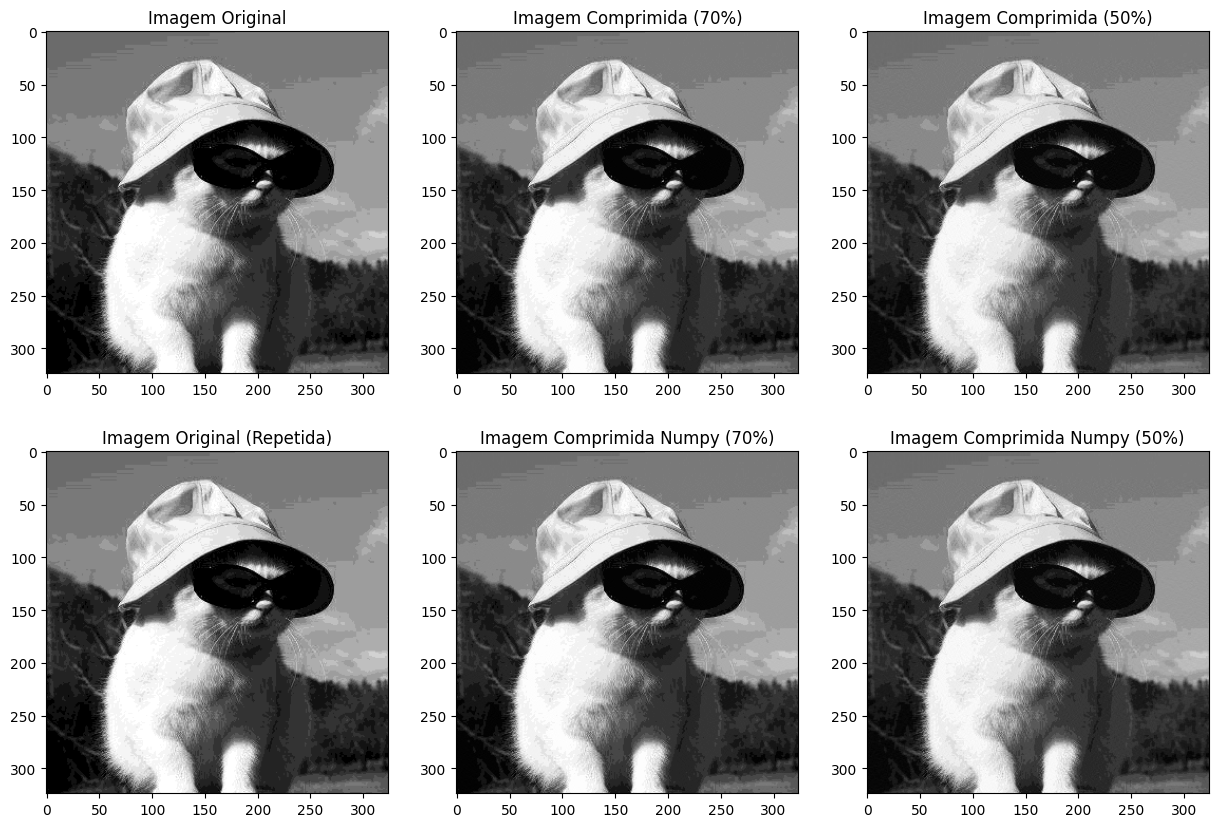

In [ ]:
# Carregando imagem em escala cinza
image = plt.imread('cat.png')
image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Função para comprimir imagem
def compress(U, S, V, k):
  compressed_image = U[:, :k] @ S[:k, :k] @ V[:k, :]
  return compressed_image

# Aplicando SVD
t = time.time()
U, S, V = svd(image)
tsvd = time.time() - t
t = time.time()
Unp, Snp, Vnp = np.linalg.svd(image)
tnp = time.time() - t
Snp = np.diag(Snp)
m, n = image.shape

# Tempos de execução
print('Tempo de execução da função criada:', tsvd)
print('Tempo de execução da função pronta:', tnp)

# Compressões
k_50 = int(min(m, n) * 0.5)
k_70 = int(min(m, n) * 0.7)
# Aplicando
compressed_50 = compress(U, S, V, k_50)
compressed_70 = compress(U, S, V, k_70)
compressed_50np = compress(Unp, Snp, Vnp, k_50)
compressed_70np = compress(Unp, Snp, Vnp, k_70)

# Plotando
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Imagem Original')

axs[0, 1].imshow(compressed_70, cmap='gray')
axs[0, 1].set_title('Imagem Comprimida (70%)')

axs[0, 2].imshow(compressed_50, cmap='gray')
axs[0, 2].set_title('Imagem Comprimida (50%)')

axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Imagem Original (Repetida)')

axs[1, 1].imshow(compressed_70np, cmap='gray')
axs[1, 1].set_title('Imagem Comprimida Numpy (70%)')

axs[1, 2].imshow(compressed_50np, cmap='gray')
axs[1, 2].set_title('Imagem Comprimida Numpy (50%)')

plt.show()

É perceptível que o tempo de execução da função de SVD criada com o Método de Francis é cerca de 100x maior que o tempo de execução da função pronta do numpy. Isso se dá, pois o Método de Francis é iterativo, e realiza um $k_{máx} = 100$ iterações. Portanto, a função do numpy é mais eficiente em tempo, mas os resultados são semelhantes.

## Exercício 2

In [ ]:
def F(t):
  return 1/(1 + 25*t**2)

In [ ]:
# Interpolação de Lagrange
def lagrange(xi, yi, x):
  n = xi.shape[0]
  L = np.ones(n) # vetor L inicializado em 1 para tomar o produto

  for i in range(n):
    for j in range(n):
      # i==j acarreta em uma divisão por 0 e, portanto, não é permitido
      # durante as sucessivas operações para calcular L[i]
      if i==j: continue

      # Como estamos interessados no produtório da razão das diferenças
      # abaixo, multiplicamos sucessivamente pelo L[i] correspondente
      L[i] = L[i]*(x - xi[j])/(xi[i] - xi[j])

  # O resultado deve ser o produto de cada yi[i] pelo L[i] correspondente,
  # sendo obtido pelo produto interno abaixo dado que yi seja um vetor
  # transposto
  return yi@L

# Interpolação de Newton
def newton(xi, yi, x):
  n = xi.shape[0]

  D = np.zeros((n,n)) # iniciamos a matriz de diferenças divididas em 0
  D[:, 0] = yi # a primeira coluna é o próprio yi

  N = np.ones(n).T # iniciamos o vetor de coeficientes de newton

  # O índice i itera sobre a coluna e, portanto, podemos pular a coluna
  # 0, que já é pré-definida
  for i in range(1, n):
    # O índice j itera sobre a linha e estamos interessados em reduzir
    # o número de linhas avaliadas à medida que avançamos na ordem das
    # diferenças divididas
    for j in range(n-i):
      # Cada termo da coluna é calculado utilizando os correspondentes
      # na coluna anterior, bem como utilizando os valores de xi
      # correspondentes
      D[j, i] = (D[j+1, i-1] - D[j, i-1])/(xi[j+i] - xi[j])

  for i in range(1, n):
    # Calculamos então os coeficientes de newton do polinômio, multiplicando
    # a diferença atual pelo termo anterior (que inclui as diferenças anteriores)
    N[i] = N[i-1]*(x - xi[i-1])

  # O resultado é o produto interno entre a primeira linha da matriz de
  # diferenças divididas e o vetor de coeficientes
  return D[0,:]@N

a) Implementação dos métodos de interpolação de **Lagrange** e **Newton**

Para calcular o polinômio da forma de Lagrange, é necessário determinar os coeficientes $\ell _i(x)$ que são, por si só, polinômios dependentes de $x$. Calculamos então o termo:

\begin{equation}
  \ell_i (x) = \prod_{i \neq j}^{n} \frac{x - x_i}{x_j - x_i}
\end{equation}

Para tal, utilizamos uma matriz preenchida por $1$ e o vetor de valores conhecidos de $x_i$. O resultado dos $\ell_i(x)$ é então armazenado em um vetor $L$ e a função retorna o produto interno $y_i \cdot L$, sendo $y_i$ o vetor de valores conhecidos para $y$.

Para o polinômio da forma de Newton, calculamos primeiro a matriz de diferenças divididas, denotada por $D$ e cada termo de ordens superiores depende dos termos de ordem inferiores:

*   Ordem 0:
  \begin{equation}
  d[x_{i_0}] = y_i
  \end{equation}
*   Ordem 1:
  \begin{equation}
  d[x_{i_0}, x_{i_1}] = \frac{d[x_{i_1}] - d[x_{i_0}]}{x_{i_1} - x_{i_0}}
  \end{equation}
*   Ordem 2:
  \begin{equation}
  d[x_{i_0}, x_{i_1}, \cdots, x_{i_k}] =
    \frac{d[x_{i_1}, x_{i_2}, \cdots, x_{i_k}] - d[x_{i_1}, x_{i_2}, \cdots, x_{i_{k-1}}]}{x_{i_k} - x_{i_0}}
  \end{equation}

Após isso, calculamos o vetor $N$ dos coeficientes de Newton, que dependem do valor $x$ a ser interpolado e compõe o polinômio, dados por:

\begin{equation}
  \{i \in \mathbb{N} | 0 \lt i \le n \} \\
  N_0 = 1 \\
  N_i = \prod_{j = 1}^{i} x - x_{j-1}
\end{equation}

Com ambos a matriz e o vetor determinados, basta tomar o produto interno entre a primeira linha da matriz $D$ e o vetor $N$ para determinar o correspondente à interpolação de um dado $x$.


(-0.4, 2.1)

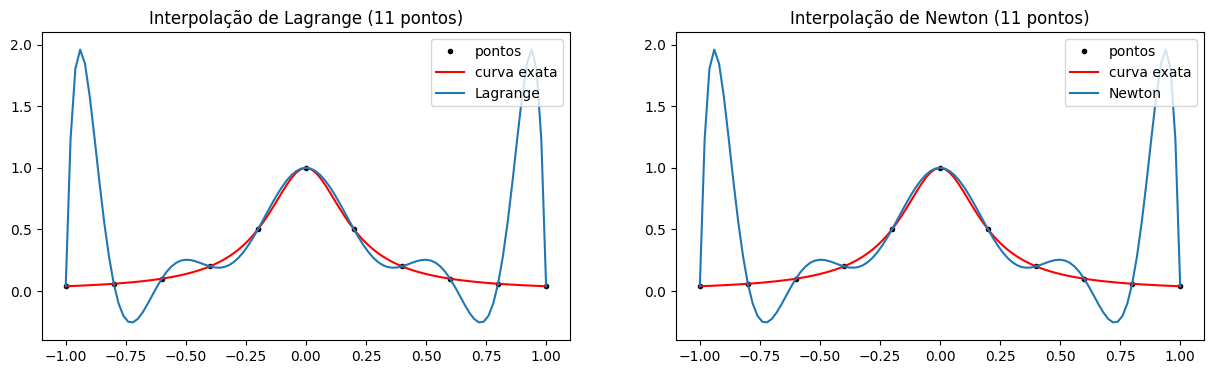

In [ ]:
# Geramos 11 pontos igualmente espaçados com seus correspondentes no eixo y
x_11 = np.linspace(-1.0, 1.0, 11)
y_11 = np.array([F(i) for i in x_11])

# Geramos pontos no intervalo [-1,1], incluindo o 1
x = np.arange(-1.0, 1.02, 0.02)

# Calculamos uma lista com cada interpolação dos pontos de x gerados
l_11 = np.array([lagrange(x_11, y_11, i) for i in x])
n_11 = np.array([lagrange(x_11, y_11, i) for i in x])
exata = np.array([F(i) for i in x]) # Geramos a lista com a solução exata

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(x_11, y_11, marker='.', color='black', linestyle='none', label='pontos')
axs[0].plot(x, exata, color='red', label='curva exata')
axs[0].plot(x, l_11, label='Lagrange')
axs[0].legend(loc='upper right')
axs[0].set_title('Interpolação de Lagrange (11 pontos)')
axs[0].set_ylim([-0.4, 2.1])

axs[1].plot(x_11, y_11, marker='.', color='black', linestyle='none', label='pontos')
axs[1].plot(x, exata, color='red', label='curva exata')
axs[1].plot(x, n_11, label='Newton')
axs[1].legend(loc='upper right')
axs[1].set_title('Interpolação de Newton (11 pontos)')
axs[1].set_ylim([-0.4, 2.1])

b) Os gráficos acima comparam as formas de interpolação de Lagrange e Newton, bem como esboçam a curva exata traçada pela função fornecida. Com os $11$ pontos igualmente espaçados, vemos que a interpolação não é a mais adequada para representar a função, em especial conforme se chega aos extremos do intervalo $[-1,1]$.

O que podemos notar, no entanto, é que ambas as formas resultam na mesma curva. De fato, se temos $11$ pontos dados por

\begin{equation}
  (x_0, y_0), (x_1, y_1), \cdots, (x_{10}, y_{10}),
\end{equation}

então existe um **único** polinômio $𝑃_{11}(x)$ que satisfaz a relação:

\begin{equation}
  y_i = 𝑃_{11}(x_i), \\
  0 \le i \le 10
\end{equation}

A consequência disso é que, independente do método utilizado para computar o polinômio, ele é, de fato, o mesmo. Portanto, é esperado que as curvas geradas pela interpolação na forma de Lagrage e na forma de Newton sejam idênticas.

(-0.5, 1.5)

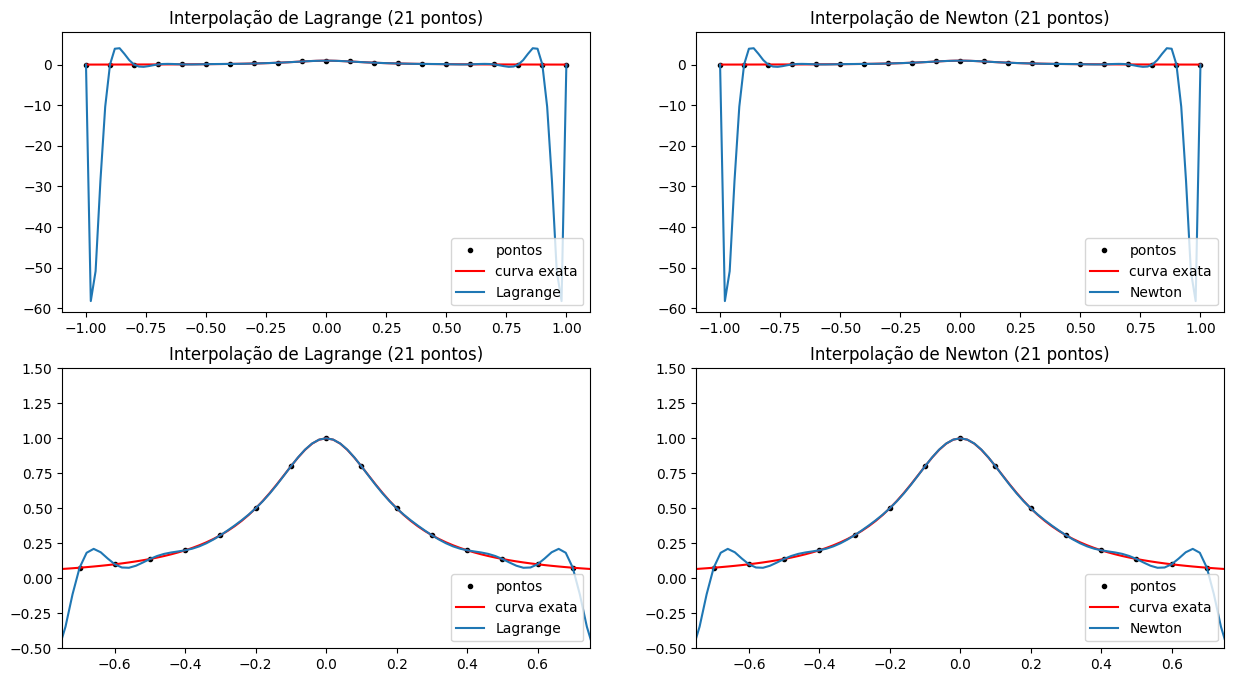

In [ ]:
# Geramos 21 pontos igualmente espaçados com seus correspondentes no eixo y
x_21 = np.linspace(-1.0, 1.0, 21)
y_21 = np.array([F(i) for i in x_21])

# Geramos pontos no intervalo [-1,1], incluindo o 1
x = np.arange(-1.0, 1.02, 0.02)

# Calculamos uma lista com cada interpolação dos pontos de x gerados
l_21 = np.array([lagrange(x_21, y_21, i) for i in x])
n_21 = np.array([lagrange(x_21, y_21, i) for i in x])
exata = np.array([F(i) for i in x]) # Geramos a lista com a solução exata

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0,0].plot(x_21, y_21, marker='.', color='black', linestyle='none', label='pontos')
axs[0,0].plot(x, exata, color='red', label='curva exata')
axs[0,0].plot(x, l_21, label='Lagrange')
axs[0,0].legend(loc='lower right')
axs[0,0].set_title('Interpolação de Lagrange (21 pontos)')
axs[0,0].set_ylim([-61, 8])

axs[0,1].plot(x_21, y_21, marker='.', color='black', linestyle='none', label='pontos')
axs[0,1].plot(x, exata, color='red', label='curva exata')
axs[0,1].plot(x, n_21, label='Newton')
axs[0,1].legend(loc='lower right')
axs[0,1].set_title('Interpolação de Newton (21 pontos)')
axs[0,1].set_ylim([-61, 8])

axs[1,0].plot(x_21, y_21, marker='.', color='black', linestyle='none', label='pontos')
axs[1,0].plot(x, exata, color='red', label='curva exata')
axs[1,0].plot(x, l_21, label='Lagrange')
axs[1,0].legend(loc='lower right')
axs[1,0].set_title('Interpolação de Lagrange (21 pontos)')
axs[1,0].set_xlim([-0.75, 0.75])
axs[1,0].set_ylim([-0.5, 1.5])

axs[1,1].plot(x_21, y_21, marker='.', color='black', linestyle='none', label='pontos')
axs[1,1].plot(x, exata, color='red', label='curva exata')
axs[1,1].plot(x, n_21, label='Newton')
axs[1,1].legend(loc='lower right')
axs[1,1].set_title('Interpolação de Newton (21 pontos)')
axs[1,1].set_xlim([-0.75, 0.75])
axs[1,1].set_ylim([-0.5, 1.5])

c) Com $21$ pontos, obtemos os gráficos acima que, à primeira vista parecem ainda mais inadequados do que a interpolação anterior. No entanto, reduzindo a escala e analisando o intervalo $[-0.6, 0.6]$ podemos notar que a curva é muito próxima da curva exata -- isto é, valores centrais ao intervalo são devidamente interpolados. Contudo, os extremos do intervalo $[-1,1]$ possuem uma interpolação ainda mais distante do valor exato, se comparado ao método com $11$ pontos. Isso se dá pelo fenômeno de Runge.

Text(0.5, 1.0, 'Spline Cúbica')

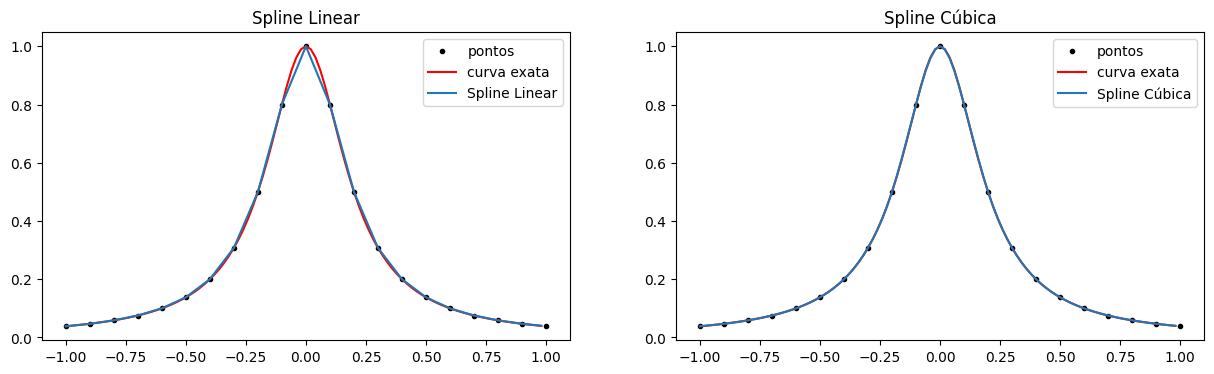

In [ ]:
# Geramos 21 pontos igualmente espaçados com seus correspondentes no eixo y
xi = np.linspace(-1.0, 1.0, 21)
yi = np.array([F(i) for i in xi])

# Geramos pontos no intervalo [-1,1], incluindo o 1
x = np.arange(-1.0, 1.0, 0.02)

# Geramos os splines linear e cúbico com os dados iniciais
splin = sci.interp1d(xi, yi, kind='linear')
spcub = sci.interp1d(xi, yi, kind='cubic')

# Fazemos a interpolação dos pontos de x dados os splines gerados acima
y_linear = splin(x)
y_cubic = spcub(x)

fig, axs = plt.subplots(1, 2, figsize=(15,4))

axs[0].plot(xi, yi, marker='.', color='black', linestyle='none', label='pontos')
axs[0].plot(x, exata, color='red', label='curva exata')
axs[0].plot(x, y_linear, label='Spline Linear')
axs[0].legend(loc='upper right')
axs[0].set_title('Spline Linear')

axs[1].plot(xi, yi, marker='.', color='black', linestyle='none', label='pontos')
axs[1].plot(x, exata, color='red', label='curva exata')
axs[1].plot(x, y_cubic, label='Spline Cúbica')
axs[1].legend(loc='upper right')
axs[1].set_title('Spline Cúbica')

d) Acima, utilizamos os *splines* para interpolar pontos dados os mesmos $21$ pontos definidos no item anterior. Podemos notar que a interpolação da interpolação utilizando *splines* é muito próxima da curva exata dada pela função fornecida, tanto pras *splines* lineares quanto pras cúbicas.

A principal diferença aqui em relação aos métodos anteriores se dá na quebra do intervalo a fim de analisar pequenos intervalos e traçar uma melhor curva que comporte os pontos desses intervalos. Para *spline* linear, traçamos uma reta entre dois pontos, o que resulta em uma curva mais grosseira, porém mais próxima da exata. Para *spline* cúbica, traçamos uma curva, descrita por um polinômio de grau $3$, entre um ponto e outro, dessa forma se aproximando quase perfeitamente da curva exata, como visto no gráfico acima.

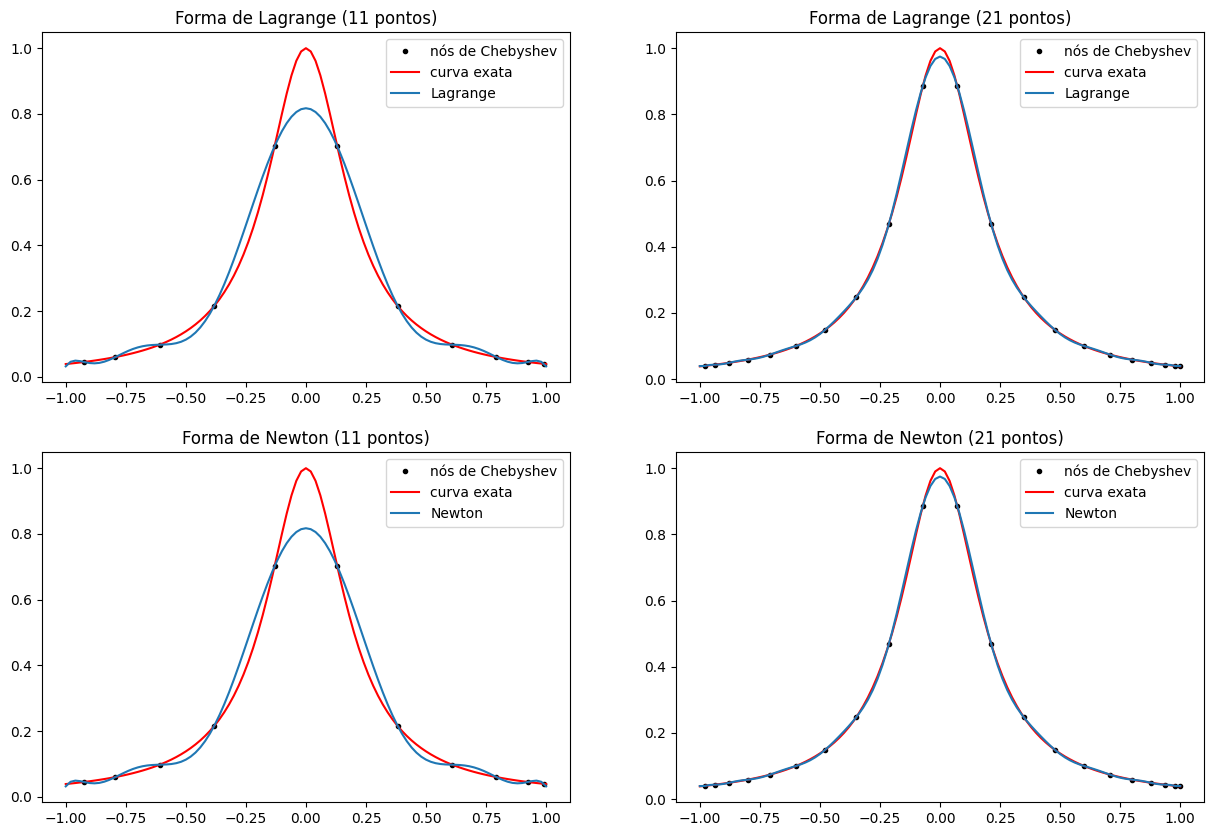

In [ ]:
# A função gera os nós de Chebyshev. O termo que inclui os limites do intervalo
# é omitido, pois se trata do intervalo [-1,1] e a equação que gera os nós
# acaba se resumindo ao termo do cosseno.
def chebyshev(n):
  return np.array([math.cos((2*i+1)*math.pi/(2*(n+1))) for i in range(n)])

# Calculamos os 11 nós de Chebyshev e seus y correspondentes
x_11 = chebyshev(11)
y_11 = np.array([F(i) for i in x_11])

# Calculamos os 21 nós de Chebyshev e seus y correspondentes
x_21 = chebyshev(21)
y_21 = np.array([F(i) for i in x_21])

# Geramos as interpolações de Lagrange e Newton utilizando os nós de Chebyshev
l_11 = np.array([lagrange(x_11, y_11, i) for i in x])
n_11 = np.array([newton(x_11, y_11, i) for i in x])
l_21 = np.array([lagrange(x_21, y_21, i) for i in x])
n_21 = np.array([newton(x_21, y_21, i) for i in x])
exata = np.array([F(i) for i in x]) # Gerando a solução exata

fig, axs = plt.subplots(2, 2, figsize=(15,10))

def plotax(axs, n, method):
  if n == 11:
    x_data = x_11
    y_data = y_11
    if method == 'Lagrange':
      y_new = l_11
    elif method == 'Newton':
      y_new = n_11
  elif n == 21:
    x_data = x_21
    y_data = y_21
    if method == 'Lagrange':
      y_new = l_21
    elif method == 'Newton':
      y_new = n_21

  axs.plot(x_data, y_data, marker='.', color='black', linestyle='none', label='nós de Chebyshev')
  axs.plot(x, exata, color='red', label='curva exata')
  axs.plot(x, y_new, label=method)
  axs.legend(loc='upper right')
  axs.set_title(f'Forma de {method} ({n} pontos)')

plotax(axs[0,0], 11, 'Lagrange')
plotax(axs[0,1], 21, 'Lagrange')
plotax(axs[1,0], 11, 'Newton')
plotax(axs[1,1], 21, 'Newton')

e) Nos itens b) e c), vimos que as curvas tomam padrões imprecisos, especialmente aos extremos do intervalo $[-1,1]$ definido, consequência do fenômeno de Runge, que nos diz que a interpolação polinomial tende a ser instável à medida que aumentamos a ordem (ou quantidade de pontos avaliados) para pontos **uniformemente espaçados**. No entanto, também pudemos notar que em ordem menor a interpolação polinomial com esses mesmos pontos não é adequada para representar a curva exata.

A solução é adotar pontos que **não sejam uniformemente espaçados**. Para tal utilizamos os **nós de Chebyshev**, calculados utilizando a equação:

\begin{equation}
x_i = \frac{a+b}{2} + \frac{b-a}{2}\cos{\left(\frac{2i + 1}{2(n+1)} \pi\right)} \\
i = 0, 1, \cdots, n
\end{equation}

Sendo que $a$ e $b$ provém do intervalo $[a,b]$ de avaliação da interpolação. Contudo, dado que utilizamos o intervalo $[-1,1]$, a equação acima se resume a:

\begin{equation}
x_i = \cos{\left(\frac{2i + 1}{2(n+1)} \pi\right)} \\
i = 0, 1, \cdots, n
\end{equation}

E, determinados os pontos, podemos refazer as interpolações de Lagrange e Newton e comparar com a curva exata da função, obtendo um resultado significativamente mais apreciável, em especial para $21$ nós. Ou seja, de fato é mais adequado realizar a interpolação polinomial com nós espaçados de maneira não uniforme, em especial utilizando os **nós de Chebyshev**.

## Exercício 3

In [ ]:
# Códigos fornecidos pelo enunciado
import numpy as np

def mmq(x, y, k):
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

def mmq_QR(x, y, k):
    X = np.vander(x, k)
    (Q, R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R, b)
    return a

a) As funções mmq e mmq_QR tem por objetivo ajustar um modelo polinomial, utilizando o método dos mínimos quadrados (MMQ). Entretanto, suas abordagens são diferentes.

Para ambas as funções, temos a entrada:

- $x$: vetor de valores independentes;
- $y$: vetor de valores dependentes;
- $k$: grau do polinômio somado com 1.

E a saída:

- $a$: vetor de coeficientes do polinômio após ajuste.

Sobre a função **mmq**:

- Primeiro, é calculada a matriz de vandermonde $X$ para os valores $x$ e $k$. Queremos:

  $X \cdot a \approx y \Rightarrow X^T \cdot X \cdot a \approx X^T \cdot y$

- Em seguida, é calculada a matriz normal $A$, fazendo:

  $A = X^T \cdot X \Rightarrow A \cdot a \approx X^T \cdot y$

- Depois, é calculado o vetor $b$, a saída do sistema normal:

  $b = X^T \cdot y$

- Por fim, com esses valores, obtemos a saída $a$:

  $A \cdot a = b$

Sobre a função **mmq_QR**:

- Primeiro, é calculada a matriz de vandermonde $X$ para os valores $x$ e $k$. Queremos:

  $X \cdot a \approx y$

- Em seguida, é feita a decomposição QR da matriz $X$. Temos:

  $X = Q \cdot R \Rightarrow Q \cdot R \cdot a \approx y \Rightarrow R \cdot a = Q^T \cdot y$

- Depois, é calculado o vetor $b$, a saída do sistema:

  $b = Q^T \cdot y$

- Por fim, com esses valores, obtemos a saída $a$:

  $R \cdot a = b$

b) Queremos uma função:

- $g(x) = ab^x$

Onde: $g(x)$ é o número acumulado de casos de Covid-19, aproximado para um dia $x$.

Fazemos a linearização dos dados, chamando $g(x)$ de $y$, temos:

- $y = ab^x \Rightarrow \ln(y) = \ln(a) + x \ln(b) \Rightarrow y = ae^{bx}$

Usaremos a função **mmq_QR** para fazer a aproximação. Veja o código abaixo:

In [ ]:
# Primeiro, preciso ler os dados do arquivo .txt
# Obs.: isso será usado nas alternativas seguintes!
with open('casosacumuladosbrasilatualizado.txt', 'r') as f:
  dados = [int(line.strip()) for line in f.readlines()]

print(dados)

[1, 1, 1, 2, 2, 2, 2, 3, 7, 13, 19, 25, 25, 34, 52, 77, 98, 121, 200, 234, 291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3903, 4256, 4579, 5717, 6834, 7910, 9056, 10278, 11130, 12056, 13717, 15927, 17857, 19638, 20727, 22169, 23430, 25262, 28320, 30425, 33682, 36599, 38654, 40581, 43079, 45757, 49492, 52995, 58509, 61888, 66501, 71886, 78162, 85380, 91299, 96396, 101147, 107780, 114715, 125218, 135106, 145328, 155939, 162699, 168331, 177589, 188974, 202918, 218223, 233142, 241080, 254220, 271628, 291579, 310087, 330890, 347398, 363211, 374898, 391222, 411821, 438238, 465166, 498440, 514200, 526447, 555383, 584016, 614941, 645771, 672846, 691758, 707412, 739503, 772416, 802828, 828810, 850514, 867624, 888271, 923189, 955377, 978142, 1032913, 1067579, 1085038, 1106470]


In [ ]:
# Irei modularizar a solução em uma função, pois
# usarei nas alternativas seguintes!

# Essa função obtém os coeficientes de aproximação usando
# o método dos mínimos quadrados e plota o gráfico.
# Parâmetros:
# x: é a entrada da função g(x), ou seja, os dias
# y: é a saída g(x), ou seja, o número de casos acumulados
def solve_mmq(x, y):
  # Vetor de casos acumulados linearizados, usando ln()
  y_log = np.log(y)

  # Como linearizamos os dados, podemos tomar k = 2,
  # já que é um polinômio de grau 1.
  k = 2

  # Obtendo coeficientes da aproximação g(x)
  coeficientes = mmq_QR(x, y_log, k)
  a = np.exp(coeficientes[1])
  b = coeficientes[0]

  print("Coeficiente a:", a)
  print("Coeficiente b:", b)

  # Obtendo valores ajustados
  y_ajust = a * np.exp(b * x)

  # Plotando gráfico
  plot_compare(x, y, y_ajust)

# Função para plotar gráfico de comparação entre
# a curva aproximada e os dados originais.
def plot_compare(x_orig, y_orig, y_ajust):
  plt.figure(figsize=(10, 6))
  plt.plot(x_orig, y_orig, label='Dados Originais')
  plt.plot(x_orig, y_ajust, label='Curva Aproximada')
  plt.title('Aproximação com Mínimos Quadrados')
  plt.xlabel('Dias')
  plt.ylabel('Casos Acumulados')
  plt.legend()
  plt.grid(True)
  plt.show()

Coeficiente a: 31.774848094479097
Coeficiente b: 0.10557730812239285


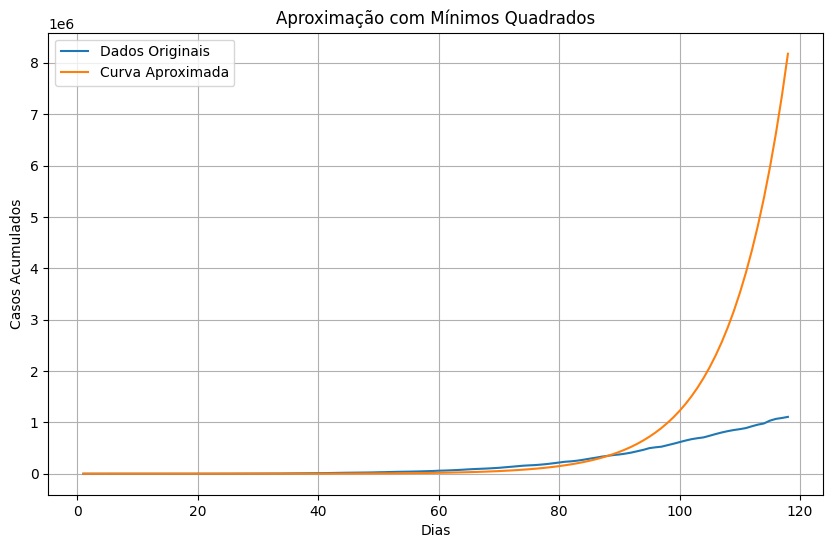

In [ ]:
# Resolvendo e plotando gráfico b)

# Quero todos os dados, tenho os dias:
x = np.arange(1, len(dados) + 1)
solve_mmq(x, dados)

c) Faremos agora para os 20 primeiros dias, temos:

Coeficiente a: 0.4348862578863413
Coeficiente b: 0.31606415467478516


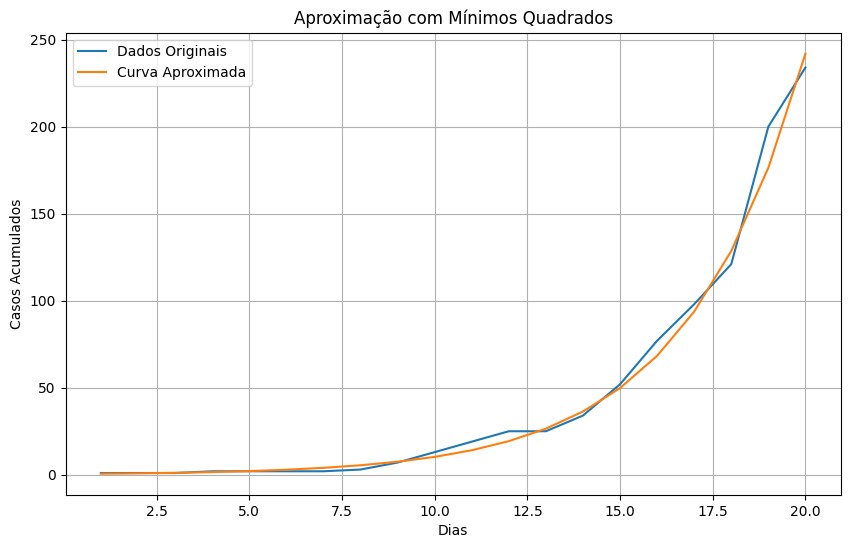

In [ ]:
# Tenho 20 primeiros dias:
x = np.arange(1, 21)
solve_mmq(x, dados[:20])

d) Faremos agora para os 50 últimos dias, temos:

Coeficiente a: 4793.522372780251
Coeficiente b: 0.04763795236663014


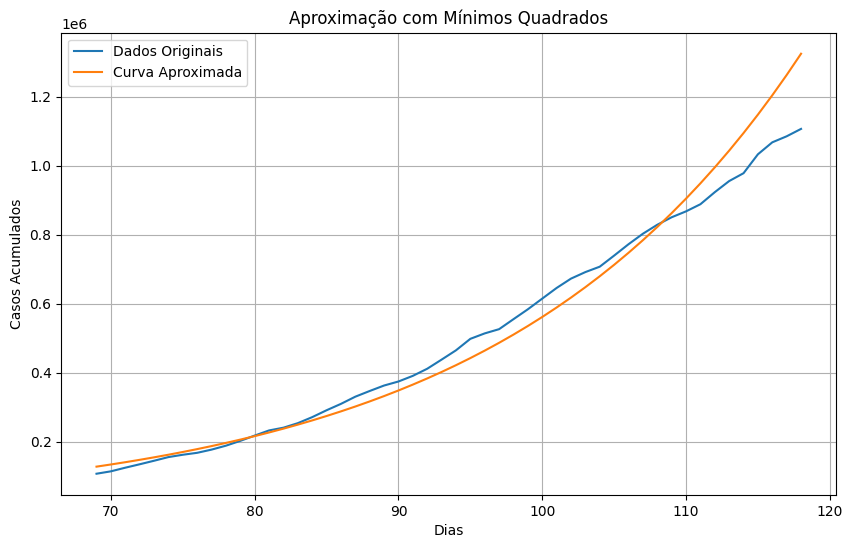

In [ ]:
# Quero os últimos 50 dias:
x = np.arange(1, len(dados) + 1)
x = x[-50:]
# Resolvendo
solve_mmq(x, dados[-50:])

e) É perceptível que as aproximações feitas nas alternativas c) e d), que apresentam apenas um recorte dos dados, representaram melhor os dados. Isso ocorre, pois, na alternativa b) (menos precisa), ao utilizar todos os dados, observamos um crescimento não linear, e o método dos mínimos quadrados é menos eficaz para esse tipo de crescimento. Assim, mesmo utilizando técnicas de linearização, é perceptivel uma eficácia menor no caso c), onde o crescimento é predominantemente não linear; enquanto nos casos b) e d), o crescimento é "aproximadamente linear".